In [1]:
# import pandas as pd
# import numpy as np
# # import torch
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import PredefinedSplit
# from sklearn import preprocessing

# seed = 42

# FILENAME = "train_dataset.csv"

# #Prepare train data
# df1 = pd.read_csv(FILENAME, encoding='ISO-8859-1', sep=",", low_memory=False)
# # print("EX1) #Righe: " + str(df1.shape[0])+ " #Colonne: "+str(df1.shape[1]))

# # print(df1.nunique())
# # print(df1.isna().sum())

# # print(df1.shape)
# df1 = df1.dropna()
# # print(df1.shape)


# y = df1["type"]
# X = df1.drop(columns=["type", "label"])

# err_arr = X.loc[X["src_bytes"] == "0.0.0.0"]
# X = X.drop(index=err_arr.index)
# y = y.drop(index=err_arr.index)
# X.astype({'src_bytes': 'int64', 'ts': 'datetime64[ms]', 'dns_AA': 'bool', 'dns_RD': 'bool', 'dns_RA': 'bool', 'dns_rejected': 'bool', 'ssl_resumed': 'bool', 'ssl_established': 'bool', 'weird_notice': 'bool'}).dtypes

# X = X.to_numpy()
# y = y.to_numpy()

# for feature in ["dns_AA","dns_RD","dns_RA","dns_rejected","ssl_version","ssl_cipher","ssl_resumed","ssl_established","ssl_subject","ssl_issuer","http_trans_depth","http_method","http_uri","http_referrer","http_version","http_request_body_len","http_response_body_len","http_status_code","http_user_agent","http_orig_mime_types","http_resp_mime_types","weird_name","weird_addl","weird_notice"]:
#     # print(f"Feature: {feature}")    
#     feature_index = np.where(df1.columns == feature)[0][0]
#     elements, counts = np.unique(X[:, feature_index], return_counts=True)

#     # for element, count in zip(elements, counts):
#     #     print(f"    Element: {element}, Count: {count}")


# oe = preprocessing.OrdinalEncoder()
# oe.fit(X)
# X = oe.transform(X)

# le = preprocessing.LabelEncoder()
# le.fit(y)
# y = le.transform(y)


# # variances = np.var(X, axis=0)
# # features = df1.columns
# # for i, variance in enumerate(variances):
# #     print(f"{features[i]} \t\t: Variance = {variance}")


# from sklearn.feature_selection import VarianceThreshold

# selector = VarianceThreshold(0.01)
# X_mod = selector.fit_transform(X)

# print(f"Original shape: {X.shape}")
# print(f"Modified shape: {X_mod.shape}")


# train_idx, test_idx = train_test_split(np.arange(X_mod.shape[0]), test_size=0.2, stratify=y, random_state=seed)
# test_idx, val_idx = train_test_split(test_idx, test_size=0.5, stratify=y[test_idx], random_state=seed)

# y_test = y[test_idx]
# y_train = y[train_idx]
# y_val = y[val_idx]

# X_test_mod = X_mod[test_idx,:]
# X_train_mod = X_mod[train_idx,:]
# X_val_mod = X_mod[val_idx,:]

# X_test = X[test_idx,:]
# X_train = X[train_idx,:]
# X_val = X[val_idx,:]

# print(X_train.shape, X_test.shape, X_val.shape)
# print(X_train_mod.shape, X_test_mod.shape, X_val_mod.shape)
# print(len(y_train), len(y_test), len(y_val))


# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn import decomposition

# ## Scaling (treshold)
# scaler = preprocessing.StandardScaler()
# scaler.fit(X_train_mod)
# X_train_mod = scaler.transform(X_train_mod)
# X_test_mod = scaler.transform(X_test_mod)
# X_val_mod = scaler.transform(X_val_mod)

# ## Scaling (no treshold)
# scaler = preprocessing.StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# X_val = scaler.transform(X_val)

# print(X_train.shape, X_test.shape, X_val.shape)
# print(X_train_mod.shape, X_test_mod.shape, X_val_mod.shape)


# ## PCA (treshold)
# pca = decomposition.PCA()
# pca.fit(X_train_mod)
# X_train_mod_pca = pca.transform(X_train_mod)
# X_test_mod_pca = pca.transform(X_test_mod)
# X_val_mod_pca = pca.transform(X_val_mod)

# ## PCA (no treshold)
# pca = decomposition.PCA()
# pca.fit(X_train)
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)
# X_val_pca = pca.transform(X_val)

# print(X_train_pca.shape, X_test_pca.shape, X_val_pca.shape)
# print(X_train_mod_pca.shape, X_test_mod_pca.shape, X_val_mod_pca.shape)


# ## LDA (treshold)
# lda = LinearDiscriminantAnalysis(n_components=9)
# lda.fit(X_train_mod, y_train)
# X_train_mod_lda = lda.transform(X_train_mod)
# X_test_mod_lda = lda.transform(X_test_mod)
# X_val_mod_lda = lda.transform(X_val_mod)

# ## LDA (no treshold)
# lda = LinearDiscriminantAnalysis(n_components=9)
# lda.fit(X_train, y_train)
# X_train_lda = lda.transform(X_train)
# X_test_lda = lda.transform(X_test)
# X_val_lda = lda.transform(X_val)

# X_train_std = X_train
# X_test_std = X_test
# X_val_std = X_val

# print(X_train_lda.shape, X_test_lda.shape, X_val_lda.shape)
# print(X_train_mod_lda.shape, X_test_mod_lda.shape, X_val_mod_lda.shape)

# Feed Forward networks

In [2]:
import random
import os
import time

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import PredefinedSplit

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from torcheval.metrics import MulticlassF1Score, MulticlassPrecision, MulticlassRecall, MulticlassAccuracy

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, Subset
from torch.utils.tensorboard import SummaryWriter

In [3]:
# For reproducibility
def fix_random(seed: int) -> None:
    """Fix all the possible sources of randomness.

    Args:
        seed: the seed to use. 
    """
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True  # slower

seed = 42

In [4]:
# Define the Data Layer        
class MyDataset(Dataset):
    def __init__(self, X, y):
        
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)
         
        self.num_features = X.shape[1]
        self.num_classes = len(np.unique(y))
       

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx, :], self.y[idx]

In [5]:
from sklearn import preprocessing
from sklearn import decomposition

# define a function with different normalization and scaling techniques
def preprocess(X_train, X_val, X_test, modality):
    
    X_train_p, X_val_p, X_test_p = X_train, X_val, X_test

    if modality == 'l2' or modality == 'l1':
        X_train_p = preprocessing.normalize(X_train, norm=modality)
        X_val_p = preprocessing.normalize(X_test, norm=modality)
        X_test_p = preprocessing.normalize(X_test, norm=modality)

    if modality == 'standard' or modality == 'min-max':
        if modality == 'standard':
            scaler = preprocessing.StandardScaler()
            scaler.fit(X_train)
        elif modality == 'min-max':
            scaler = preprocessing.MinMaxScaler()
            scaler.fit(X_train)
        
        X_train_p = scaler.transform(X_train)
        X_val_p = scaler.transform(X_val)
        X_test_p = scaler.transform(X_test)

    if modality == 'pca':
        pca = decomposition.PCA()
        pca.fit(X_train)
        X_train_p = pca.transform(X_train)
        X_val_p = pca.transform(X_val)
        X_test_p = pca.transform(X_test)
        
    return X_train_p, X_val_p, X_test_p

In [6]:
# Architecture

class FeedForwardPlus(nn.Module):
    def __init__(self, input_size, num_classes, hidden_size, depth=1, batch_norm=False, drop=0):
        super(FeedForwardPlus, self).__init__()
        
        model = []
        model += [nn.Linear(input_size, hidden_size)]
        if batch_norm:
            model += [nn.BatchNorm1d(hidden_size)]
        model += [nn.ReLU()]

        block = [
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        ]

        block_batch_norm = [
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU()
        ]

        block_dropout = [
            nn.Dropout(drop),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        ]

        for i in range(depth):
            if not batch_norm and drop == 0:
                model += block
            elif batch_norm and drop == 0:
                model += block_batch_norm
            elif drop > 0 and not batch_norm:
                model += block_dropout
        
        self.model = nn.Sequential(*model)
        
        self.output = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        h = self.model(x)
        out = self.output(h)
        return out


In [7]:
# Define a function to evaluate the performance on validation and test sets

def test_model(model, data_loader, device):
    model.eval()
    y_pred = []
    y_test = []
    
    for data, targets in data_loader:
        data, targets = data.to(device), targets.to(device)
        y_pred += model(data)
        #print(y_pred)
        y_test += targets
        #print(targets)
    
    y_test = torch.stack(y_test).squeeze()
    y_pred = torch.stack(y_pred).squeeze()
    y_pred_c = y_pred.argmax(dim=1, keepdim=True).squeeze()
    
    return y_test, y_pred_c, y_pred

In [8]:
from sklearn.metrics import precision_recall_curve

# Define a function for the training process

# def train_model(model, criterion, optimizer, epoch, scheduler, train_loader, val_loader, device, writer, log_name="model"):
def train_model(model, criterion, optimizer, epoch, scheduler, train_loader, val_loader, device, writer, log_name):
    n_iter = 0
    best_valid_loss = float('inf')
    for epoch in range(epoch):
        model.train()
        
        for data, targets in train_loader:
            data, targets = data.to(device), targets.to(device)  # why here?
            
            optimizer.zero_grad()

            # Forward pass
            y_pred = model(data)

            # Compute Loss
            loss = criterion(y_pred, targets)
            # writer.add_scalar("Loss/train", loss, n_iter)
            writer.add_scalar("Loss/train " + log_name, loss, n_iter)

            # Backward pass
            loss.backward()
            optimizer.step()

            n_iter += 1
        
        # labels, _, y_pred = test_model(model, val_loader, device)
        labels, y_pred_c, y_pred = test_model(model, val_loader, device)


        loss_val = criterion(y_pred, labels)
        # writer.add_scalar("Loss/val", loss_val, epoch)
        writer.add_scalar("Loss/val " + log_name, loss_val, epoch)

        metric = MulticlassF1Score(num_classes=10)
        metric.update(y_pred, labels)
        f1 = metric.compute()
        # writer.add_scalar("F1/val:", f1.item(), epoch)
        writer.add_scalar("F1/val " + log_name, f1.item(), epoch)

        # ----------------

        # metric = MulticlassPrecision(num_classes=10)
        # metric.update(labels, y_pred_c)
        # prec = metric.compute()
        # writer.add_scalar("Precision/val:", prec.item(), epoch)

        # acc = (labels == y_pred_c).float().sum() / labels.shape[0]
        # writer.add_scalar("Accuracy/val:", acc.cpu().numpy(), epoch)

        # ----------------

        # prec = precision_score(labels.cpu().data.numpy(), y_pred.cpu().data.numpy(), average='weighted')
        # writer.add_scalar("prec/val", prec, epoch)

        # f1 = f1_score(labels.cpu().data.numpy(), y_pred.cpu().data.numpy(), average='weighted')
        # writer.add_scalar("f1/val", f1, epoch)

        # writer.add_scalar("acc/val", accuracy_score(labels.cpu().data.numpy(), y_pred.cpu().data.numpy()), epoch)
        # writer.add_scalar("pr_auc/val", roc_auc_score(labels.cpu().data.numpy(), y_pred.cpu().data.numpy(), multi_class='ovo'), epoch)
        # writer.add_scalar("pr_auc/val", roc_auc_score(labels.cpu().data.numpy(), y_pred.cpu().data.numpy(), multi_class='ovr'), epoch)
        # writer.add_pr_curve("pr_curve/val", labels, y_pred, epoch)
        # def add_pr_curve_tensorboard(class_index, test_probs, test_label, global_step):
        #     '''
        #     Takes in a "class_index" from 0 to 9 and plots the corresponding
        #     precision-recall curve
        #     '''
        #     tensorboard_truth = test_label == class_index
        #     tensorboard_probs = test_probs[:, class_index]

        #     writer.add_pr_curve(str(class_index), 
        #                         tensorboard_truth, 
        #                         tensorboard_probs, 
        #                         global_step=global_step)

        # for i in range(labels.unique().shape[0]):
        #     add_pr_curve_tensorboard(i, y_pred, labels, epoch)


        # save best model
        if loss_val.item() < best_valid_loss:
            best_valid_loss = loss_val.item()
            if not os.path.exists('models'):
                os.makedirs('models')
            torch.save(model.state_dict(), 'models/'+log_name)
        
        # writer.add_scalar("hparam/Learning Rate", scheduler.get_last_lr()[0], epoch)
        
        scheduler.step()
            
    return model, best_valid_loss

In [9]:
# look for GPU
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('mps')
print("Device: {}".format(device))

Device: mps


In [10]:
seed = 42

FILENAME = "train_dataset.csv"

df1 = pd.read_csv(FILENAME, encoding='ISO-8859-1', sep=",", low_memory=False)
df1 = df1.dropna()
y = df1["type"]
X = df1.drop(columns=["type", "label"])

err_arr = X.loc[X["src_bytes"] == "0.0.0.0"]
X = X.drop(index=err_arr.index)
y = y.drop(index=err_arr.index)
X.astype({'src_bytes': 'int64', 'ts': 'datetime64[ms]', 'dns_AA': 'bool', 'dns_RD': 'bool', 'dns_RA': 'bool', 'dns_rejected': 'bool', 'ssl_resumed': 'bool', 'ssl_established': 'bool', 'weird_notice': 'bool'}).dtypes

# X = X.to_numpy()
y = y.to_numpy()

X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(exclude=['object'])
oe = preprocessing.OrdinalEncoder()
oe.fit(X_cat)
X_cat = oe.transform(X_cat)
X = np.concatenate((X_cat, X_num), axis=1)
print(X.shape)

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

indeces = np.arange(X.shape[0])
train_idx, test_idx = train_test_split(indeces, test_size=0.1, stratify=y, random_state=seed)
test_idx, val_idx = train_test_split(test_idx, test_size=0.5, stratify=y[test_idx], random_state=seed)

fold = np.zeros(X.shape[0])
fold[train_idx] = -1

ps = PredefinedSplit(fold)
ps.get_n_splits()

y_test = y[test_idx]
y_train = y[train_idx]
y_val = y[val_idx]

X_test = X[test_idx,:]
X_train = X[train_idx,:]
X_val = X[val_idx,:]

## importnt thing is to obtain X_train, X_val, X_test and y_train, y_val, y_test (already encoded)

# Scale data
modality = "scaler"  # 'l2', 'l1', 'min-max'
X_train, X_val, X_test = preprocess(X_train, X_val, X_test, modality)

# Dimensionality reduction
modality = "pca"  # 'lda', 'threshold'
X_train, X_val, X_test = preprocess(X_train, X_val, X_test, modality)


# Create the dataset
train_dataset = MyDataset(X_train, y_train)
val_dataset = MyDataset(X_val, y_val)
test_dataset = MyDataset(X_test, y_test)

(616983, 44)


Run Tensorboard from the command line:

"tensorboard --logdir runs/"

In [ ]:
start = time.time()

# hyperparatemeters 
batch_size = 1024    # try 32, 64, 128, 256, 512
depth = 2
hidden_size = 16
batch_norm = True
drop = 0
num_epochs = 30  # try 100, 200, 500
learning_rate = 0.01
gamma = 0.5
step_size = 25
log_name = "B"+str(batch_size)+"-dim"+str(hidden_size)+"-dp"+str(depth)+"-ep"+str(num_epochs)+"-lr"+str(learning_rate)+"-steplr"+str(step_size)+"-gamma"+str(gamma)+"-BN"+str(batch_norm)+"-drop"+str(drop)

# fix the seed for reproducibility
fix_random(seed)


# Create relative dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


# Define the architecture, loss and optimizer
model = FeedForwardPlus(train_dataset.num_features, train_dataset.num_classes, hidden_size, depth, batch_norm=batch_norm, drop=drop)
print(model)
model.to(device)


# Define the training elements
criterion = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)


# Test before the training
y_test, y_pred_c, _ = test_model(model, test_loader, device)
acc = (y_test == y_pred_c).float().sum() / y_test.shape[0]
print("Accuracy before training:", acc.cpu().numpy())


# Start tensorboard
writer = SummaryWriter('runs/'+log_name)


# Train the model 
model, best_valid_loss = train_model(model, criterion, optimizer, num_epochs, scheduler, train_loader, val_loader, device, writer, log_name)


# Load best model
model.load_state_dict(torch.load("models/"+log_name, weights_only=True))
model.to(device)


# Test after the training
y_test, y_pred_c, _ = test_model(model, test_loader, device)
acc = (y_test == y_pred_c).float().sum() / y_test.shape[0]
print("Accuracy after training:", acc.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(y_test.cpu().numpy(), y_pred_c.cpu().numpy())
ConfusionMatrixDisplay(cm).plot()

# Close tensorboard writer after a training
writer.flush()
writer.close()

# Save timestamp
end = time.time()
print("Time elapsed:", end - start)

In [11]:
# Grid Search 

#hyperparameters
# seed = 42
# batch_sizes = [16, 32]
# hidden_sizes = [16, 32] # 64
# batch_norm_list = [False, True]
# drop = 0
# depths = [2, 4]
# num_epochs = 100
# learning_rate = 0.01
# gammas = [1, 0.5]
# step_size = num_epochs / 4
seed = 42
batch_sizes = [128, 256, 512, 1024]
hidden_size = 16
batch_norm_list = [False, True]
drop = 0
depth = 2
num_epochs = 40
learning_rate = 0.01
gammas = [1, 0.5]
step_size = 10

import itertools
hyperparameters = itertools.product(batch_sizes, gammas, batch_norm_list)

best_loss = float('inf')
best_model = None

#grid search loop
for batch_size, gamma, batch_norm in hyperparameters:
    fix_random(seed)
    
    start = time.time()

    log_name = "B"+str(batch_size)+"-dim"+str(hidden_size)+"-dp"+str(depth)+"-ep"+str(num_epochs)+"-lr"+str(learning_rate)+"-steplr"+str(step_size)+"-gamma"+str(gamma)+"-BN"+str(batch_norm)+"-drop"+str(drop)
    print(log_name, end=", ")
    
    #start tensorboard
    writer = SummaryWriter('runs/'+log_name)

    # Create relative dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    #define architecture, loss and optimizer
    model = FeedForwardPlus(train_dataset.num_features, train_dataset.num_classes, hidden_size, depth, batch_norm=batch_norm)
    model.to(device)
    

    #train
    criterion = torch.nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    model, best_valid_loss = train_model(model, criterion, optimizer, num_epochs, scheduler, train_loader, val_loader, device, writer, log_name)

    if best_valid_loss < best_loss:
        best_loss = best_valid_loss
        best_model = model

    # writer.add_hparams({'hparam/bsize': batch_size, 'hparam/hidden size': hidden_size, 'hparam/depth':depth+2, 'hparam/scheduler': gamma,'hparam/batch norm': batch_norm}, {'best loss': best_valid_loss})
    writer.add_hparams({'hparam/bsize': batch_size, 'hparam/scheduler': gamma,'hparam/batch norm': batch_norm}, {'best loss': best_valid_loss})
    writer.flush()

    print("time elapsed:", time.time() - start)
writer.close()

B128-dim16-dp2-ep40-lr0.01-steplr10-gamma1-BNFalse-drop0, time elapsed: 928.6233229637146
B128-dim16-dp2-ep40-lr0.01-steplr10-gamma1-BNTrue-drop0, time elapsed: 1207.3971028327942
B128-dim16-dp2-ep40-lr0.01-steplr10-gamma0.5-BNFalse-drop0, time elapsed: 805.251158952713
B128-dim16-dp2-ep40-lr0.01-steplr10-gamma0.5-BNTrue-drop0, time elapsed: 1180.1896381378174
B256-dim16-dp2-ep40-lr0.01-steplr10-gamma1-BNFalse-drop0, time elapsed: 482.26451897621155
B256-dim16-dp2-ep40-lr0.01-steplr10-gamma1-BNTrue-drop0, time elapsed: 685.5132820606232
B256-dim16-dp2-ep40-lr0.01-steplr10-gamma0.5-BNFalse-drop0, time elapsed: 506.842826128006
B256-dim16-dp2-ep40-lr0.01-steplr10-gamma0.5-BNTrue-drop0, time elapsed: 681.9002130031586
B512-dim16-dp2-ep40-lr0.01-steplr10-gamma1-BNFalse-drop0, time elapsed: 329.08368587493896
B512-dim16-dp2-ep40-lr0.01-steplr10-gamma1-BNTrue-drop0, time elapsed: 421.13389706611633
B512-dim16-dp2-ep40-lr0.01-steplr10-gamma0.5-BNFalse-drop0, time elapsed: 305.9050920009613
B5

<bound method Module.get_parameter of FeedForwardPlus(
  (model): Sequential(
    (0): Linear(in_features=44, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
  )
  (output): Linear(in_features=16, out_features=10, bias=True)
)>
Accuracy of the best model on the test set: 0.2909981


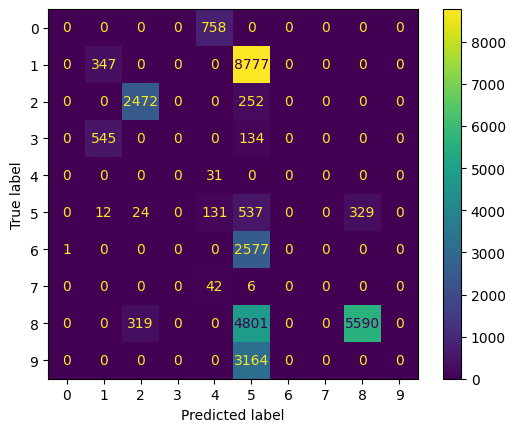

In [18]:
test_loader = DataLoader(test_dataset, batch_size=batch_size)
# Choose and load the best model and evaluate it on the test set
# filename = "models/B16-dim16-dp4-ep100-lr0.01-steplr25.0-gamma1-BNFalse-drop0"
# model = FeedForwardPlus(train_dataset.num_features, train_dataset.num_classes, 16, 4)
# best_model.load_state_dict(torch.load(filename, weights_only=True))
best_model.to(device)
y_test, y_pred_c, _ = test_model(model, test_loader, device)
acc = (y_test == y_pred_c).float().sum() / y_test.shape[0]

cm = confusion_matrix(y_test.cpu().numpy(), y_pred_c.cpu().numpy())
ConfusionMatrixDisplay(cm).plot()

print("Accuracy of the best model on the test set:", acc.cpu().numpy())